In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
def explore_zarr_structure(zarr_path):
    callset = zarr.open_group(zarr_path, mode='r')
    print(f"📁 Exploring: {zarr_path}")
    print("\nStructure:")
    print(callset.tree())
    return callset

In [8]:
zarr_path_coluzzii = "AR0047-C.gatk.zarr"
callset_coluzzii = explore_zarr_structure(zarr_path_coluzzii)

📁 Exploring: AR0047-C.gatk.zarr

Structure:


/
└── AR0047-C
    ├── 2L
    │   ├── calldata
    │   │   ├── AD (48525747, 1, 4) int16
    │   │   ├── GQ (48525747, 1) int8
    │   │   └── GT (48525747, 1, 2) int8
    │   └── variants
    │       └── MQ (48525747,) float32
    ├── 2R
    │   ├── calldata
    │   │   ├── AD (60132453, 1, 4) int16
    │   │   ├── GQ (60132453, 1) int8
    │   │   └── GT (60132453, 1, 2) int8
    │   └── variants
    │       └── MQ (60132453,) float32
    ├── 3L
    │   ├── calldata
    │   │   ├── AD (40758473, 1, 4) int16
    │   │   ├── GQ (40758473, 1) int8
    │   │   └── GT (40758473, 1, 2) int8
    │   └── variants
    │       └── MQ (40758473,) float32
    ├── 3R
    │   ├── calldata
    │   │   ├── AD (52226568, 1, 4) int16
    │   │   ├── GQ (52226568, 1) int8
    │   │   └── GT (52226568, 1, 2) int8
    │   └── variants
    │       └── MQ (52226568,) float32
    ├── Mt
    │   ├── calldata
    │   │   ├── AD (15363, 1, 4) int16
    │   │   ├── GQ (15363, 1) int8
    │   │   └── GT (15363, 1, 2) int8
    │   └── variants
    │       └── MQ (15363,) float32
    ├── UNKN
    │   ├── calldata
    │   │   ├── AD (27274988, 1, 4) int16
    │   │   ├── GQ (27274988, 1) int8
    │   │   └── GT (27274988, 1, 2) int8
    │   └── variants
    │       └── MQ (27274988,) float32
    ├── X
    │   ├── calldata
    │   │   ├── AD (23385349, 1, 4) int16
    │   │   ├── GQ (23385349, 1) int8
    │   │   └── GT (23385349, 1, 2) int8
    │   └── variants
    │       └── MQ (23385349,) float32
    └── Y_unplaced
        ├── calldata
        │   ├── AD (135155, 1, 4) int16
        │   ├── GQ (135155, 1) int8
        │   └── GT (135155, 1, 2) int8
        └── variants
            └── MQ (135155,) float32

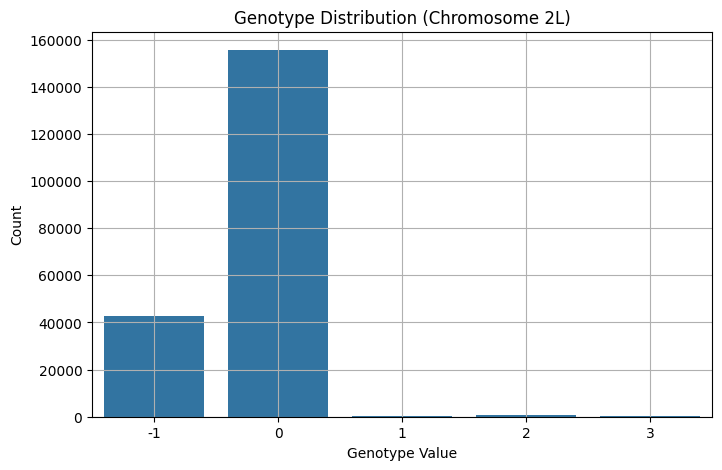

In [9]:
gt_2L = callset_coluzzii["AR0047-C/2L/calldata/GT"][:100000]  # just sample
gt_2L_flat = gt_2L.reshape(-1, 2)

# Count unique genotypes
unique, counts = np.unique(gt_2L_flat, return_counts=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts)
plt.title("Genotype Distribution (Chromosome 2L)")
plt.xlabel("Genotype Value")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [10]:
file_species_map = {
    "AB0142-C.gatk.zarr": "gambiae",
    "AG0152-C.gatk.zarr": "bissau",
    "AK0105-C.gatk.zarr": "gcs3"
}

callsets = {}

for fname, species in file_species_map.items():
    print(f"\n===== Exploring {fname} ({species}) =====\n")
    callsets[species] = explore_zarr_structure(fname)


===== Exploring AB0142-C.gatk.zarr (gambiae) =====

📁 Exploring: AB0142-C.gatk.zarr

Structure:


C:\Users\Gautam kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\zarr\core\group.py:3301: UserWarning: Object at .ipynb_checkpoints is not recognized as a component of a Zarr hierarchy.
  warnings.warn(


/
└── AB0142-C
    ├── 2L
    │   ├── calldata
    │   │   ├── AD (48525747, 1, 4) int16
    │   │   ├── GQ (48525747, 1) int8
    │   │   └── GT (48525747, 1, 2) int8
    │   └── variants
    │       └── MQ (48525747,) float32
    ├── 2R
    │   ├── calldata
    │   │   ├── AD (60132453, 1, 4) int16
    │   │   ├── GQ (60132453, 1) int8
    │   │   └── GT (60132453, 1, 2) int8
    │   └── variants
    │       └── MQ (60132453,) float32
    ├── 3L
    │   ├── calldata
    │   │   ├── AD (40758473, 1, 4) int16
    │   │   ├── GQ (40758473, 1) int8
    │   │   └── GT (40758473, 1, 2) int8
    │   └── variants
    │       └── MQ (40758473,) float32
    ├── 3R
    │   ├── calldata
    │   │   ├── AD (52226568, 1, 4) int16
    │   │   ├── GQ (52226568, 1) int8
    │   │   └── GT (52226568, 1, 2) int8
    │   └── variants
    │       └── MQ (52226568,) float32
    ├── Mt
    │   ├── calldata
    │   │   ├── AD (15363, 1, 4) int16
    │   │   ├── GQ (15363, 1) int8
    │   │   └── GT (15363, 1, 2) int8
    │   └── variants
    │       └── MQ (15363,) float32
    ├── UNKN
    │   ├── calldata
    │   │   ├── AD (27274988, 1, 4) int16
    │   │   ├── GQ (27274988, 1) int8
    │   │   └── GT (27274988, 1, 2) int8
    │   └── variants
    │       └── MQ (27274988,) float32
    ├── X
    │   ├── calldata
    │   │   ├── AD (23385349, 1, 4) int16
    │   │   ├── GQ (23385349, 1) int8
    │   │   └── GT (23385349, 1, 2) int8
    │   └── variants
    │       └── MQ (23385349,) float32
    └── Y_unplaced
        ├── calldata
        │   ├── AD (135155, 1, 4) int16
        │   ├── GQ (135155, 1) int8
        │   └── GT (135155, 1, 2) int8
        └── variants
            └── MQ (135155,) float32



===== Exploring AG0152-C.gatk.zarr (bissau) =====

📁 Exploring: AG0152-C.gatk.zarr

Structure:


/
└── AG0152-C
    ├── 2L
    │   ├── calldata
    │   │   ├── AD (48525747, 1, 4) int16
    │   │   ├── GQ (48525747, 1) int8
    │   │   └── GT (48525747, 1, 2) int8
    │   └── variants
    │       └── MQ (48525747,) float32
    ├── 2R
    │   ├── calldata
    │   │   ├── AD (60132453, 1, 4) int16
    │   │   ├── GQ (60132453, 1) int8
    │   │   └── GT (60132453, 1, 2) int8
    │   └── variants
    │       └── MQ (60132453,) float32
    ├── 3L
    │   ├── calldata
    │   │   ├── AD (40758473, 1, 4) int16
    │   │   ├── GQ (40758473, 1) int8
    │   │   └── GT (40758473, 1, 2) int8
    │   └── variants
    │       └── MQ (40758473,) float32
    ├── 3R
    │   ├── calldata
    │   │   ├── AD (52226568, 1, 4) int16
    │   │   ├── GQ (52226568, 1) int8
    │   │   └── GT (52226568, 1, 2) int8
    │   └── variants
    │       └── MQ (52226568,) float32
    ├── Mt
    │   ├── calldata
    │   │   ├── AD (15363, 1, 4) int16
    │   │   ├── GQ (15363, 1) int8
    │   │   └── GT (15363, 1, 2) int8
    │   └── variants
    │       └── MQ (15363,) float32
    ├── UNKN
    │   ├── calldata
    │   │   ├── AD (27274988, 1, 4) int16
    │   │   ├── GQ (27274988, 1) int8
    │   │   └── GT (27274988, 1, 2) int8
    │   └── variants
    │       └── MQ (27274988,) float32
    ├── X
    │   ├── calldata
    │   │   ├── AD (23385349, 1, 4) int16
    │   │   ├── GQ (23385349, 1) int8
    │   │   └── GT (23385349, 1, 2) int8
    │   └── variants
    │       └── MQ (23385349,) float32
    └── Y_unplaced
        ├── calldata
        │   ├── AD (135155, 1, 4) int16
        │   ├── GQ (135155, 1) int8
        │   └── GT (135155, 1, 2) int8
        └── variants
            └── MQ (135155,) float32



===== Exploring AK0105-C.gatk.zarr (gcs3) =====

📁 Exploring: AK0105-C.gatk.zarr

Structure:


/
└── AK0105-C
    ├── 2L
    │   ├── calldata
    │   │   ├── AD (48525747, 1, 4) int16
    │   │   ├── GQ (48525747, 1) int8
    │   │   └── GT (48525747, 1, 2) int8
    │   └── variants
    │       └── MQ (48525747,) float32
    ├── 2R
    │   ├── calldata
    │   │   ├── AD (60132453, 1, 4) int16
    │   │   ├── GQ (60132453, 1) int8
    │   │   └── GT (60132453, 1, 2) int8
    │   └── variants
    │       └── MQ (60132453,) float32
    ├── 3L
    │   ├── calldata
    │   │   ├── AD (40758473, 1, 4) int16
    │   │   ├── GQ (40758473, 1) int8
    │   │   └── GT (40758473, 1, 2) int8
    │   └── variants
    │       └── MQ (40758473,) float32
    ├── 3R
    │   ├── calldata
    │   │   ├── AD (52226568, 1, 4) int16
    │   │   ├── GQ (52226568, 1) int8
    │   │   └── GT (52226568, 1, 2) int8
    │   └── variants
    │       └── MQ (52226568,) float32
    ├── Mt
    │   ├── calldata
    │   │   ├── AD (15363, 1, 4) int16
    │   │   ├── GQ (15363, 1) int8
    │   │   └── GT (15363, 1, 2) int8
    │   └── variants
    │       └── MQ (15363,) float32
    ├── UNKN
    │   ├── calldata
    │   │   ├── AD (27274988, 1, 4) int16
    │   │   ├── GQ (27274988, 1) int8
    │   │   └── GT (27274988, 1, 2) int8
    │   └── variants
    │       └── MQ (27274988,) float32
    ├── X
    │   ├── calldata
    │   │   ├── AD (23385349, 1, 4) int16
    │   │   ├── GQ (23385349, 1) int8
    │   │   └── GT (23385349, 1, 2) int8
    │   └── variants
    │       └── MQ (23385349,) float32
    └── Y_unplaced
        ├── calldata
        │   ├── AD (135155, 1, 4) int16
        │   ├── GQ (135155, 1) int8
        │   └── GT (135155, 1, 2) int8
        └── variants
            └── MQ (135155,) float32

In [13]:
callsets

{'gambiae': <Group file://AB0142-C.gatk.zarr>,
 'bissau': <Group file://AG0152-C.gatk.zarr>,
 'gcs3': <Group file://AK0105-C.gatk.zarr>}

## Explore Genotype (GT)

In [16]:

species_to_root = {
    "gambiae": "AB0142-C",
    "bissau": "AG0152-C",
    "gcs3": "AK0105-C",
    "coluzzii": "AR0047-C"
}

def gt_stats(callset, root_name, chrom="2L", sample_limit=100000):
    path = f"{root_name}/{chrom}/calldata/GT"
    gt = callset[path][:sample_limit]
    gt_flat = gt.reshape(-1, 2)

    print(f"Chromosome: {chrom}")
    print(f"GT Path: {path}")
    print(f"GT Shape: {gt.shape}")
    print(f"Unique GT Values: {np.unique(gt_flat)}")
    print(f"Mean: {gt_flat.mean():.3f}")
    print(f"Std Dev: {gt_flat.std():.3f}")
    print("-" * 40)

# Loop through and analyze
for species, callset in callsets.items():
    root_name = species_to_root[species]
    print(f"\n=== {species.upper()} ===")
    gt_stats(callset, root_name)



=== GAMBIAE ===
Chromosome: 2L
GT Path: AB0142-C/2L/calldata/GT
GT Shape: (100000, 1, 2)
Unique GT Values: [-1  0  1  2  3]
Mean: -0.205
Std Dev: 0.444
----------------------------------------

=== BISSAU ===
Chromosome: 2L
GT Path: AG0152-C/2L/calldata/GT
GT Shape: (100000, 1, 2)
Unique GT Values: [-1  0  1  2  3]
Mean: -0.196
Std Dev: 0.456
----------------------------------------

=== GCS3 ===
Chromosome: 2L
GT Path: AK0105-C/2L/calldata/GT
GT Shape: (100000, 1, 2)
Unique GT Values: [-1  0  1  2  3]
Mean: -0.336
Std Dev: 0.540
----------------------------------------


## Explore Allelic Depth (AD)

In [17]:
def ad_stats(callset, root_name, chrom="2L", sample_limit=100000):
    path = f"{root_name}/{chrom}/calldata/AD"
    ad = callset[path][:sample_limit]
    
    # ad shape is (N, 1, 4), so flatten it
    ad_flat = ad.reshape(-1, 4)
    
    print(f"Chromosome: {chrom}")
    print(f"AD Path: {path}")
    print(f"AD Shape: {ad.shape}")
    print(f"Mean across alleles (0–3): {np.mean(ad_flat, axis=0)}")
    print("-" * 40)

for species, callset in callsets.items():
    root_name = species_to_root[species]
    print(f"\n=== {species.upper()} ===")
    ad_stats(callset, root_name)



=== GAMBIAE ===
Chromosome: 2L
AD Path: AB0142-C/2L/calldata/AD
AD Shape: (100000, 1, 4)
Mean across alleles (0–3): [34.25258 -0.11811 -0.11473 -0.13664]
----------------------------------------

=== BISSAU ===
Chromosome: 2L
AD Path: AG0152-C/2L/calldata/AD
AD Shape: (100000, 1, 4)
Mean across alleles (0–3): [37.13053 -0.06239 -0.05018 -0.1002 ]
----------------------------------------

=== GCS3 ===
Chromosome: 2L
AD Path: AK0105-C/2L/calldata/AD
AD Shape: (100000, 1, 4)
Mean across alleles (0–3): [28.96323 -0.20786 -0.20114 -0.23836]
----------------------------------------


## Explore Mapping Quality (MQ)

In [18]:
def mq_stats(callset, root_name, chrom="2L", sample_limit=100000):
    path = f"{root_name}/{chrom}/variants/MQ"
    mq = callset[path][:sample_limit]
    
    mq = mq[~np.isnan(mq)]  # Remove NaNs
    
    print(f"Chromosome: {chrom}")
    print(f"MQ Path: {path}")
    print(f"MQ Length: {len(mq)}")
    print(f"Min: {mq.min()}, Max: {mq.max()}, Mean: {mq.mean():.3f}, Std: {mq.std():.3f}")
    print("-" * 40)

for species, callset in callsets.items():
    root_name = species_to_root[species]
    print(f"\n=== {species.upper()} ===")
    mq_stats(callset, root_name)



=== GAMBIAE ===
Chromosome: 2L
MQ Path: AB0142-C/2L/variants/MQ
MQ Length: 97082
Min: 0.0, Max: 63.11000061035156, Mean: 34.915, Std: 22.095
----------------------------------------

=== BISSAU ===
Chromosome: 2L
MQ Path: AG0152-C/2L/variants/MQ
MQ Length: 99230
Min: 0.0, Max: 62.47999954223633, Mean: 32.992, Std: 21.975
----------------------------------------

=== GCS3 ===
Chromosome: 2L
MQ Path: AK0105-C/2L/variants/MQ
MQ Length: 89714
Min: 0.0, Max: 61.25, Mean: 26.659, Std: 21.512
----------------------------------------


## Zarr Dataset Exploration & Visualization for Anopheles Species

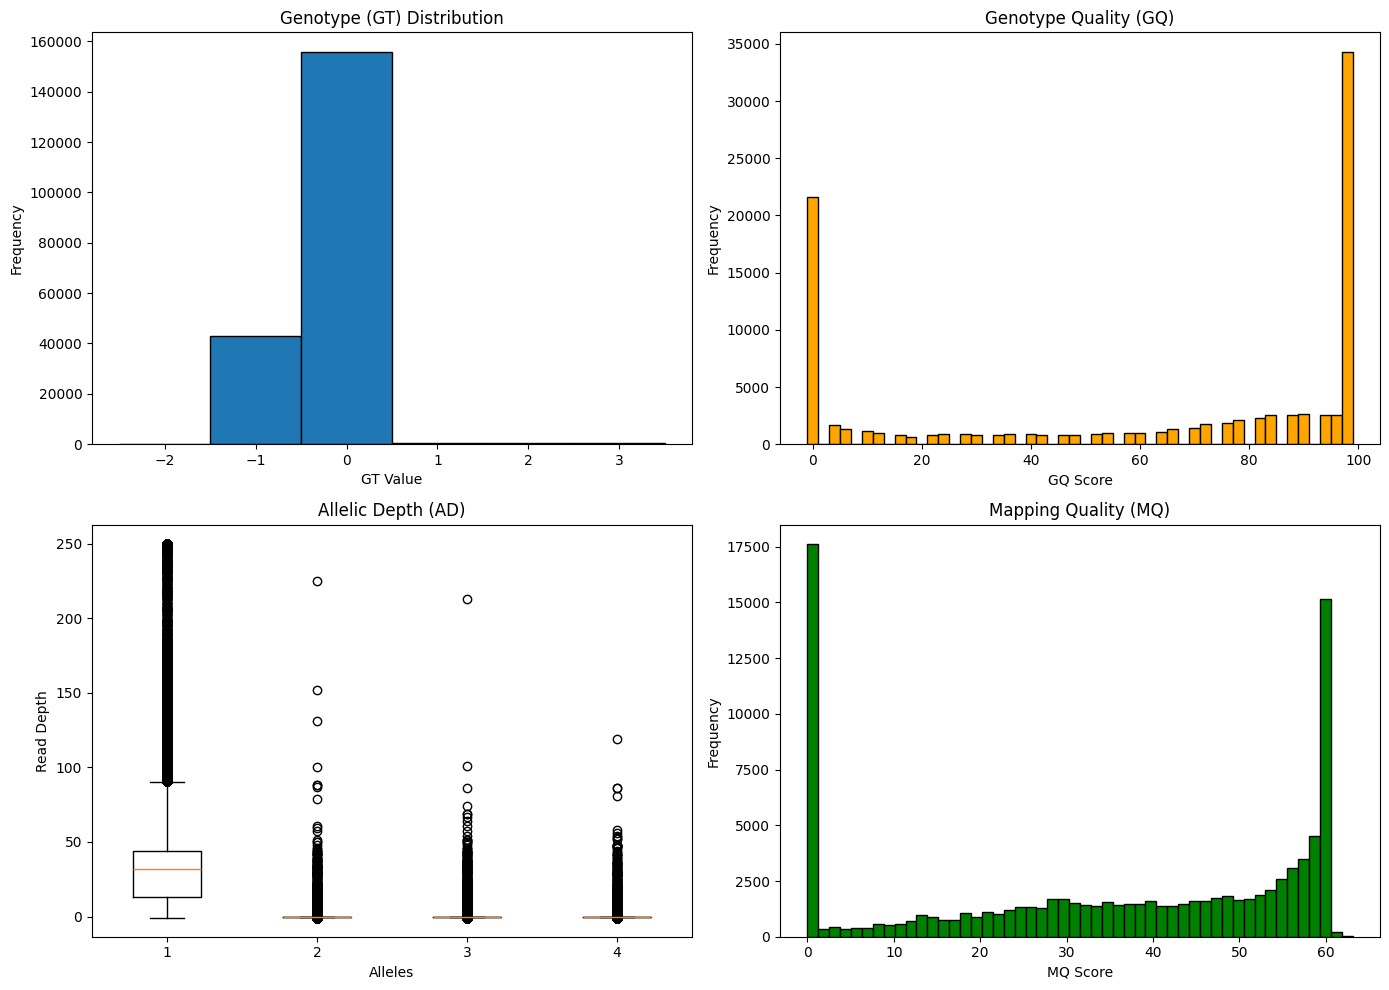

In [20]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

# Load Zarr dataset
zarr_path = "AB0142-C.gatk.zarr"  # Example species: gambiae
callset = zarr.open_group(zarr_path, mode="r")
root_name = list(callset.group_keys())[0]  # This gives AB0142-C

# Define relevant paths
gt_path = f"{root_name}/2L/calldata/GT"
gq_path = f"{root_name}/2L/calldata/GQ"
ad_path = f"{root_name}/2L/calldata/AD"
mq_path = f"{root_name}/2L/variants/MQ"

# Load a sample portion of the data
gt = callset[gt_path][:100000].reshape(-1, 2)
gq = callset[gq_path][:100000].flatten()
ad = callset[ad_path][:100000].reshape(-1, 4)
mq = callset[mq_path][:100000]
mq = mq[~np.isnan(mq)]

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# GT histogram
axs[0, 0].hist(gt.flatten(), bins=np.arange(-2, 5) - 0.5, edgecolor="black")
axs[0, 0].set_title("Genotype (GT) Distribution")
axs[0, 0].set_xlabel("GT Value")
axs[0, 0].set_ylabel("Frequency")

# GQ histogram
axs[0, 1].hist(gq, bins=50, color="orange", edgecolor="black")
axs[0, 1].set_title("Genotype Quality (GQ)")
axs[0, 1].set_xlabel("GQ Score")
axs[0, 1].set_ylabel("Frequency")

# AD boxplot
axs[1, 0].boxplot([ad[:, i] for i in range(4)])
axs[1, 0].set_title("Allelic Depth (AD)")
axs[1, 0].set_xlabel("Alleles")
axs[1, 0].set_ylabel("Read Depth")

# MQ histogram
axs[1, 1].hist(mq, bins=50, color="green", edgecolor="black")
axs[1, 1].set_title("Mapping Quality (MQ)")
axs[1, 1].set_xlabel("MQ Score")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Insights we Can Derive:
- GT Distribution: Which genotype combinations are frequent (-1 means missing).

- GQ Scores: How confident the system is about genotype calls.

- AD Patterns: Which alleles are more represented in reads.

- MQ Scores: Reliability of the mapping in that chromosome.

## Correlations between Genotype and Variant Quality

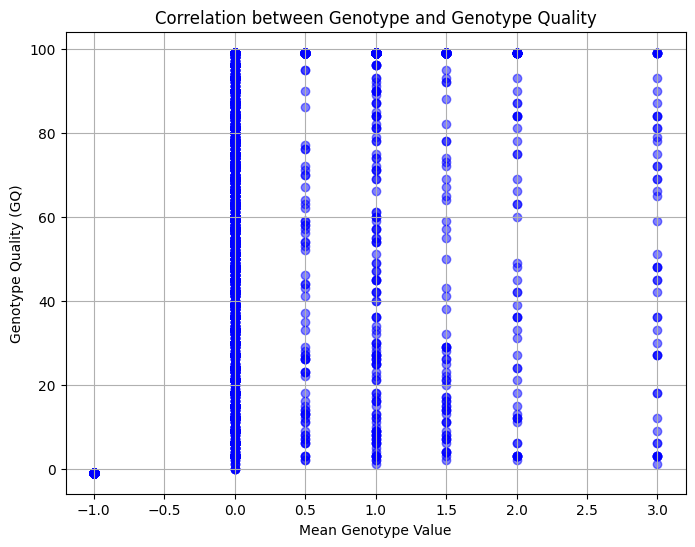

Correlation coefficient: 0.738


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean of genotype (GT) and genotype quality (GQ)
gt_mean = gt.mean(axis=1)  # Mean of 2 alleles at each SNP
gq_mean = gq  # Assuming gq is already a 1D array

# Compute correlation coefficient
corr = np.corrcoef(gt_mean, gq_mean)[0, 1]

# Plot the correlation
plt.figure(figsize=(8, 6))
plt.scatter(gt_mean, gq_mean, color='blue', alpha=0.5)
plt.title("Correlation between Genotype and Genotype Quality")
plt.xlabel("Mean Genotype Value")
plt.ylabel("Genotype Quality (GQ)")
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f"Correlation coefficient: {corr:.3f}")


A correlation coefficient of 0.7 indicates a moderate to strong positive correlation between the mean genotype values (GT) and genotype quality (GQ). This suggests that, generally, higher genotype quality values are associated with higher genotype values.

 ## Allelic Depth (AD) Analysis

C:\Users\Gautam kumar\AppData\Local\Temp\ipykernel_13800\2853999485.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ad[:, i] for i in range(4)], labels=["A", "T", "C", "G"])


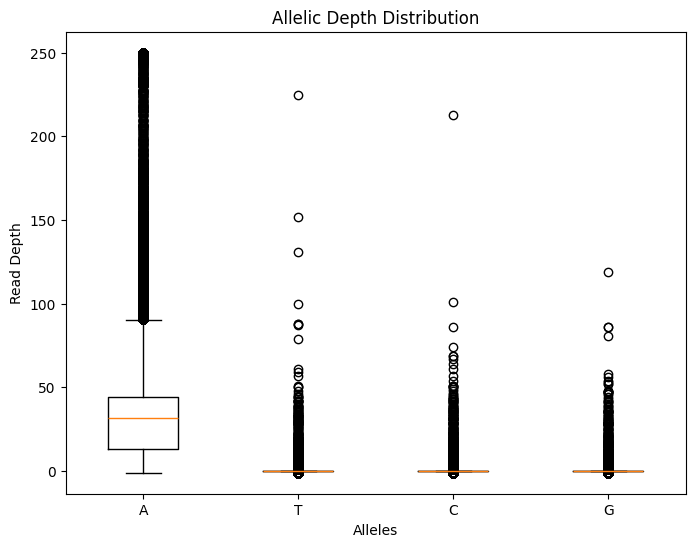

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot([ad[:, i] for i in range(4)], labels=["A", "T", "C", "G"])
plt.title("Allelic Depth Distribution")
plt.xlabel("Alleles")
plt.ylabel("Read Depth")
plt.show()

## Mapping Quality (MQ) Analysis

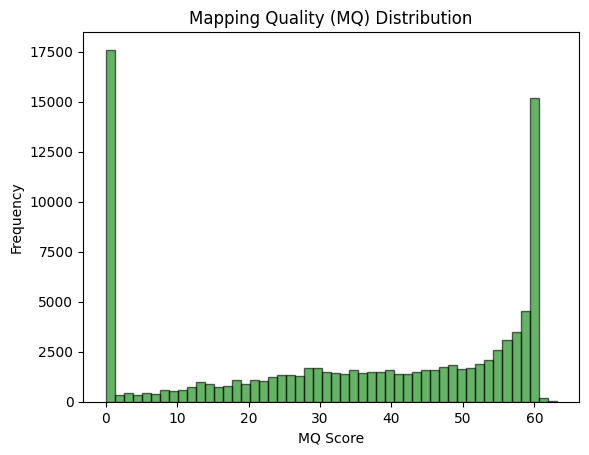

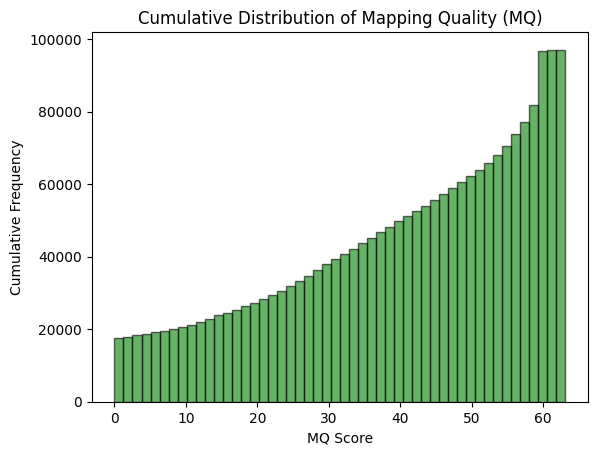

In [27]:
# Histogram for MQ distribution
plt.hist(mq, bins=50, color='green', alpha=0.6, edgecolor='black')
plt.title("Mapping Quality (MQ) Distribution")
plt.xlabel("MQ Score")
plt.ylabel("Frequency")
plt.show()

# CDF of Mapping Quality (MQ)
plt.hist(mq, bins=50, cumulative=True, color='green', alpha=0.6, edgecolor='black')
plt.title("Cumulative Distribution of Mapping Quality (MQ)")
plt.xlabel("MQ Score")
plt.ylabel("Cumulative Frequency")
plt.show()


## Plot SNP Quality Distribution (GQ vs AD)

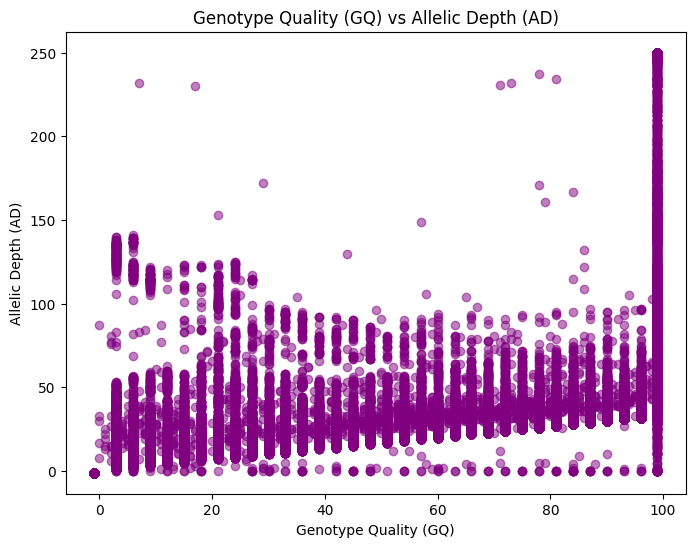

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(gq, ad[:, 0], alpha=0.5, color='purple')
plt.title("Genotype Quality (GQ) vs Allelic Depth (AD)")
plt.xlabel("Genotype Quality (GQ)")
plt.ylabel("Allelic Depth (AD)")
plt.show()


## Genotype Frequency Across Chromosomes

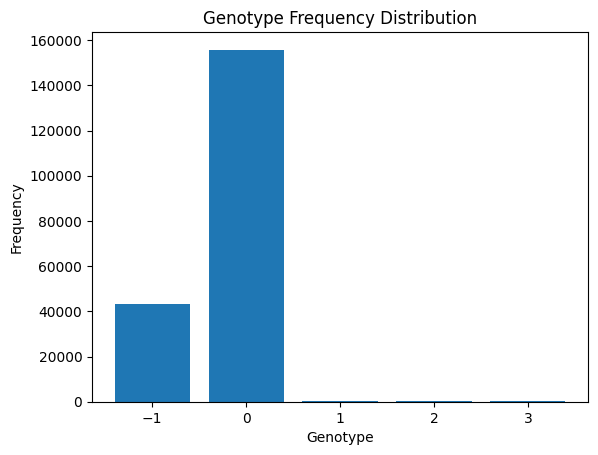

In [29]:
# Example to count GT frequencies across a chromosome
gt_flat = gt.flatten()
unique_genotypes, counts = np.unique(gt_flat, return_counts=True)

plt.bar(unique_genotypes, counts)
plt.title("Genotype Frequency Distribution")
plt.xlabel("Genotype")
plt.ylabel("Frequency")
plt.show()


## Dimensionality Reduction for SNP Features

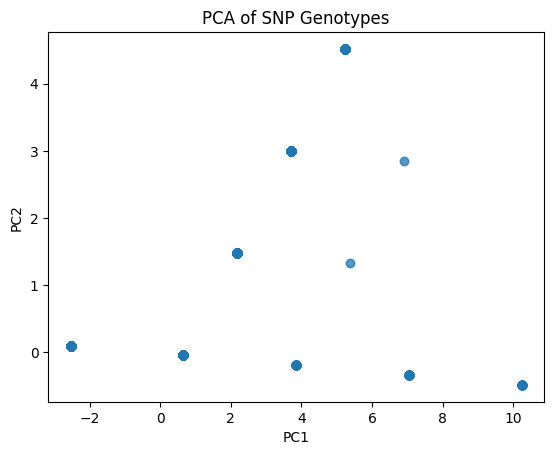

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data first
scaler = StandardScaler()
gt_scaled = scaler.fit_transform(gt)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gt_scaled)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA of SNP Genotypes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Distribution of Species in Labels:

In [34]:
labels = pd.read_csv("data/labels.tsv", sep="\t")
print(labels.value_counts())


coluzzii  
gambiae       1473
coluzzii       704
arabiensis     368
bissau         170
gcx3            65
unassigned       3
Name: count, dtype: int64


Conclusion:
- Imbalanced Dataset: The dataset shows significant class imbalance, with An. gambiae being the most frequent, followed by An. coluzzii, and the others being much less frequent.

- Impact on Classification: This imbalance can cause the model to be biased towards the overrepresented species, primarily An. gambiae. The model may struggle to predict the underrepresented species like gcx3 or bissau, resulting in misclassifications.

- Possible Solutions:

  Resampling: Techniques like oversampling the minority classes (e.g., gcx3, bissau) or undersampling the majority class (e.g., An. gambiae) could help address the imbalance.

  Class Weights: Adjusting the class weights during training can give more importance to the underrepresented species and improve classification accuracy for them.

  SMOTE (Synthetic Minority Over-sampling Technique): This can be applied to generate synthetic samples for the minority classes to balance the dataset.

- Impact on Model Performance:

  Class Imbalance: The class imbalance will likely affect model evaluation metrics such as accuracy, as models may predict the majority class more often, leading to higher accuracy scores but poor performance for minority classes.

  Evaluation Metrics: It's essential to rely on metrics like F1-score, Precision, Recall, and ROC-AUC to get a more balanced evaluation of model performance, especially for the minority classes.

  Potential for Overfitting:

       Overfitting to Dominant Classes: The model might overfit to the majority class (An. gambiae), as it has more data points. This could result in poor generalization to the minority classes. Cross-validation with stratified sampling can help mitigate this issue.